# **Are Police Killings Flawed?**
Hari Kumaresan, Rayo Belihomji, Hanish Mutyala

# **Introduction**

* The overall objective of this project is to see if there is any sort of trend when it comes to the Americans that were killed by police from all across the United States. In order to determine if police killings are flawed and purely based on bias, or is it truely following the law. There have been plenty of studies when researchers have seen negative trends when it comes to police killing innocent Americans. In addition, it is a known stigma that police tend to target African Americans at a higher rate compared to any other race in the United States. However, in this tutorial we will determine if this is true, and also to see if there are other factors to see if there is a pattern when it comes to police killing Americans.

# **Gathering Data**

* Fortunately, for this tutorial we weren't required to create data from scratch. We have actually found a dataset that was already generated by the Guardian, that was keeping track of all the Americans that were killed by police between the months of January and May of 2015. In this dataset, there are a total of 467 entries. This dataset is perfect for analysis because it involves many factors such as age, gender, location, and race. These factors could be used to do some in depth analysis on the if police killings are flawed. 

* We have downloaded the [dataset](https://colab.research.google.com/drive/1XLO-OW06eloe5d5rwCs3sTKdBAUWn9Lc#scrollTo=VkAdePp6xBhj&line=3&uniqifier=1) from [Github.](https://github.com/fivethirtyeight/data/tree/master/police-killings) Then we used the pandas library to property read the dataset and store the data in a Pandas Dataframe.

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as mt
import seaborn as sns
import folium
import requests
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Used Pandas class to read dataset and store in Dataframe
df = pd.read_csv ('https://raw.githubusercontent.com/fivethirtyeight/data/master/police-killings/police_killings.csv', encoding='latin-1')
df

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,latitude,longitude,state_fp,county_fp,tract_ce,geo_id,county_id,namelsad,lawenforcementagency,cause,armed,pop,share_white,share_black,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,32.529577,-86.362829,1,51,30902,1051030902,1051,Census Tract 309.02,Millbrook Police Department,Gunshot,No,3779,60.5,30.5,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,31.321739,-92.434860,22,79,11700,22079011700,22079,Census Tract 117,Rapides Parish Sheriff's Office,Gunshot,No,2769,53.8,36.2,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,42.583560,-87.835710,55,59,1200,55059001200,55059,Census Tract 12,Kenosha Police Department,Gunshot,No,4079,73.8,7.7,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,33.939298,-118.219463,6,37,535607,6037535607,6037,Census Tract 5356.07,South Gate Police Department,Gunshot,Firearm,4343,1.2,0.6,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,41.148575,-81.429878,39,153,530800,39153530800,39153,Census Tract 5308,Kent Police Department,Gunshot,No,6809,92.5,1.4,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,William Chapman II,18,Male,Black,April,22,2015,1098 Frederick Blvd,Portsmouth,VA,36.829014,-76.341438,51,740,211500,51740211500,51740,Census Tract 2115,Portsmouth Police Department,Gunshot,No,1640,40.9,53.8,0,25262,27418.0,46166,0.593900,1.0,1.0,35.2,0.152047,0.120553
463,William Dick III,28,Male,Native American,April,4,2015,Bureau of Indian Affairs Rd 66,Tonasket,WA,48.708542,-119.436829,53,47,970400,53047970400,53047,Census Tract 9704,US Forest Service,Taser,Firearm,4154,74.5,0.4,20.2,18470,35608.0,40368,0.882085,1.0,2.0,27.3,0.133650,0.174525
464,William Poole,52,Male,White,March,16,2015,130 Wedowee Ln,Gaston,NC,35.205776,-81.240669,37,71,31704,37071031704,37071,Census Tract 317.04,Gaston County Police Department,Gunshot,Firearm,3850,83.2,10.1,0.3,21175,38200.0,42017,0.909156,2.0,2.0,28.5,0.256150,0.072764
465,Yuvette Henderson,38,Female,Black,February,3,2015,3800 Hollis St,Oakland,CA,37.827129,-122.284492,6,1,401700,6001401700,6001,Census Tract 4017,Emeryville Police Department,Gunshot,Firearm,2544,21.7,24.9,37.1,26971,63052.0,72112,0.874362,2.0,4.0,23.9,0.069601,0.396476


To begin, after we found the datset on Github, we copied that URL of the raw contents of the csv file. Then we used the pandas class, specifically the read_csv() function, to convert the dataset into a Dataframe and printed it out. Converting the dataset to a Dataframe allows us to retrive and manipulate the data to our liking when it comes to analyzing the data. We noticed that in the dataset there is only 2 entries for the month June, so we are disregarding the month June for out analysis because there is not enough data to make conclusions for that month. 
 
Below are the descriptions of all the columns in the dataset

**Column Name -	Description**
* name - Name of deceased	Guardian
* age -	Age of deceased	Guardian
* gender -	Gender of deceased	Guardian
* raceethnicity -	Race/ethnicity of deceased	Guardian
* month	- Month of killing	Guardian
* day	- Day of incident	Guardian
* year -	Year of incident	Guardian
* streetaddress	- Address/intersection where incident occurred	Guardian
* city -	City where incident occurred	Guardian
* state -	State where incident occurred	Guardian
* latitude -	Latitude, geocoded from address	
* longitude -	Longitude, geocoded from address	
* state_fp -	State FIPS code	Census
* county_fp -	County FIPS code	Census
* tract_ce -	Tract ID code	Census
* geo_id -	Combined tract ID code	
* county_id -	Combined county ID code	
* namelsad -	Tract description	Census
* lawenforcementagency -	Agency involved in incident	Guardian
* cause -	Cause of death	Guardian
* armed -	How/whether deceased was armed	Guardian
* pop -	Tract population	Census
* share_white -	Share of pop that is non-Hispanic white	Census
* share_bloack -	Share of pop that is black (alone, not in combination)	Census
* share_hispanic -	Share of pop that is Hispanic/Latino (any race)	Census
* p_income -	Tract-level median personal income	Census
* h_income -	Tract-level median household income	Census
* county_income -	County-level median household income	Census
* comp_income -	h_income / county_income	Calculated from Census
* county_bucket -	Household income, quintile within county	Calculated from Census
* nat_bucket -	Household income, quintile nationally	Calculated from Census
* pov -	Tract-level poverty rate (official)	Census
* urate -	Tract-level unemployment rate	Calculated from Census
* college -	Share of 25+ pop with BA or higher







# **Exploratory Data Analysis**

In this section, we will be looking at how different graphs can we used to analyze our data to get a better understanding of any potential trends that might occur. 

First, we wanted to see which race was killed the most amongst the entire United States during early 2015. For this situation, we decided that using a bar graph is the best because you will be able to see all the number of kills for each race individually in one graph. 

In the code below, we are traversing through all the rows in the Dataframe of the column 'raceethnicity', which tells what race of the person killed, and counting the occurance of each unique race. 

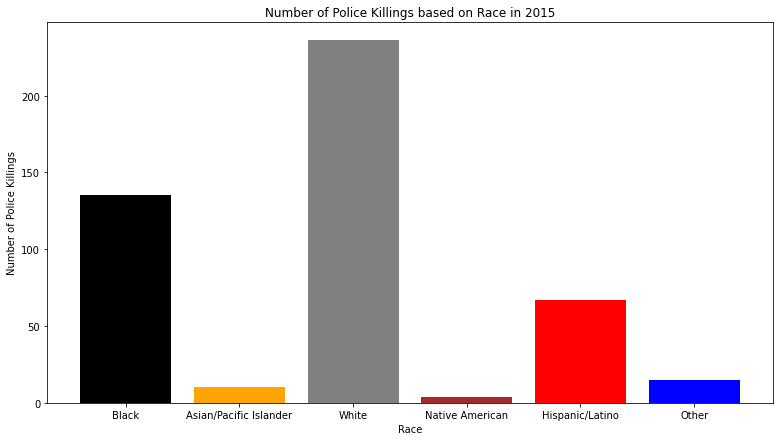

In [ ]:
#Counter for each race
black = 0
unknown = 0
white = 0
asian = 0
nativeAm = 0
hispanic = 0


for data in df['raceethnicity']:
  if data == 'Black':
    black += 1
  elif data == 'Asian/Pacific Islander':
    asian += 1
  elif data == 'White':
    white += 1
  elif data == 'Native American':
    nativeAm += 1
  elif data == 'Hispanic/Latino':
    hispanic += 1
  elif data == 'Unknown':
    unknown += 1


index = ["Black", "Asian/Pacific Islander", 
         "White", "Native American", "Hispanic/Latino", "Other"]
race = [black, asian, white, nativeAm, hispanic, unknown]

#Plots the given data in a barplot format 
mt.figure(figsize=(13,7))
mt.bar(index, race, align='center',color=['black', 'orange',
                                          'grey', 'brown', 'red', 'blue'])
mt.title('Number of Police Killings based on Race in 2015')
mt.xlabel('Race')
mt.ylabel('Number of Police Killings')
mt.show()

Using the graph generated above, it is much clear to see which race was killed the most, rather than looking at the dataset. According to the graph, the white race was killed the most, and then the African Americans, followed by Hispanics, Other, Asians, and then lastly Native Americans. Something else that was interesting was that African American are almost half the times that of white race. 

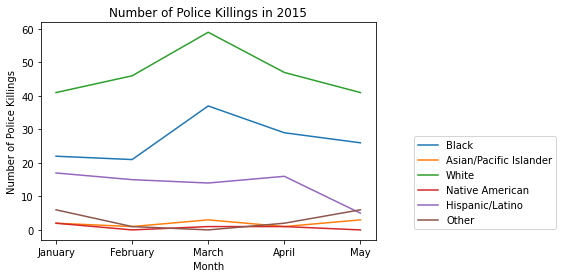

In [ ]:
# Code is used to display a line plot of Police Killings per 

# Creates Table labeled as temp_def which is useful for retrieving the 
# race which is killed on a certain month


# temp_def consists of Months from January- May such that each row is asociated
# with a month

# 0 -> January
# 1 -> February 
# 2 -> March
# 3 -> April
# 4 -> May

column = ['Black', 'Asian/Pacific Islander','White',
          'Native American','Hispanic/Latino','Unknown']

index = range(0,5)
# INIT table
temp_df = pd.DataFrame(index=index,columns=column)

# Assings all values to 0 in the temp_def table
for col in temp_df.columns:
  temp_df[col].values[:] = 0

# Util function to retrieve the associated race
def raceCtr(val1,month):
  if val1 == 'Black':
    temp_df[val1][month] += 1
  elif val1 == 'Asian/Pacific Islander':
    temp_df[val1][month] += 1
  elif val1 == 'White':
    temp_df[val1][month] += 1
  elif val1 == 'Native American':
    temp_df[val1][month] += 1
  elif val1 == 'Hispanic/Latino':
    temp_df[val1][month] += 1
  elif val1 == 'Unknown':
    temp_df[val1][month] += 1


ctr = 0

# Gather count of the number of Police killings per month
for data in df['month']:
  
  # Access the race column associated with the month
  val1 = df.loc[ctr,'raceethnicity']
  ctr +=1
  if data == 'January':
    raceCtr(val1,0)
  elif data == 'February':
    raceCtr(val1,1)   
  elif data == 'March':   
    raceCtr(val1,2)   
  elif data == 'April':
    raceCtr(val1,3)   
  elif data == 'May':
    raceCtr(val1,4) 

# INIT months
index = ["January", "February", "March", "April", "May"]

race = [black, asian, white, nativeAm, hispanic, unknown]

# Plots the data for each race
mt.plot(index,temp_df['Black'],label='Black')
mt.plot(index,temp_df['Asian/Pacific Islander'],label='Asian/Pacific Islander')
mt.plot(index,temp_df['White'],label='White')
mt.plot(index,temp_df['Native American'],label='Native American')
mt.plot(index,temp_df['Hispanic/Latino'],label='Hispanic/Latino')
mt.plot(index,temp_df['Unknown'],label='Other')

# Assigns the axis and the title
mt.title('Number of Police Killings in 2015')
mt.xlabel('Month')
mt.ylabel('Number of Police Killings')
mt.legend(bbox_to_anchor=(1.1, .5))
mt.show()

According to this line plot for each race, one can notice that white people had the most police killings for months between January and May. Moreover for all races except "Other", one can notice that the number of police killings was at a peak on March. In addition, between the months of March and April, the number of  police killings between Black,White, Asian/Pacific Islander started to  decrease.

In [ ]:
# Code used to display a general Map of the given Police Killings based on a
# person's sex and race

import random


#Generate origin of the map
map_osm = folium.Map(width=800,height=600,location=[40.295886, -99.118818], zoom_start=4)
sampleList = []
count = 0

# Generate Sample of 150
while count < 150:
    val = random.randint(0, len(df['raceethnicity']))
    if val not in sampleList:
        sampleList.append(val)
        count += 1


# Mark each person's race with a color
# Black - black marker
# White - white marker
# Unknown - pink marker
# Native American - blue Marker
# Asian/Pacific Islander - green Marker
# Hispanic/Latino - purple Marker
# NaN - No Marker

for i in sampleList:
    #Stores data based on the ith value
    locationVal = [df['latitude'].values[i],df['longitude'].values[i]]
    popupVal = "Race : " + str(df['raceethnicity'].values[i])
    
    # Checks each given race and plots the given marker
    if df['raceethnicity'].values[i] == 'Black':
        folium.Marker(
            location=locationVal,
            popup= popupVal,
            icon=folium.Icon(color='black'),
        ).add_to(map_osm)
        
    elif df['raceethnicity'].values[i] == 'Asian/Pacific Islander':
       folium.Marker(
            location=locationVal,
            popup= popupVal,
            icon=folium.Icon(color='green'),
        ).add_to(map_osm)
        
    elif df['raceethnicity'].values[i] == 'White':
        folium.Marker(
            location=locationVal,
            popup= popupVal,
            icon=folium.Icon(color='white'),
        ).add_to(map_osm)
    
    elif df['raceethnicity'].values[i] == 'Native American':
        folium.Marker(
            location=locationVal,
            popup= popupVal,
            icon=folium.Icon(color= 'blue'),
        ).add_to(map_osm)
    
    elif df['raceethnicity'].values[i] == 'Hispanic/Latino':
        folium.Marker(
            location=locationVal,
            popup= popupVal,
            icon=folium.Icon(color='purple'),
        ).add_to(map_osm)
        
    elif df['raceethnicity'].values[i] == 'Unknown':
        folium.Marker(
            location=locationVal,
            popup= popupVal,
            icon=folium.Icon(color='pink'),
        ).add_to(map_osm)
        

# Circles for person's sex with relative information on arrest_table 
# Blue Circles correlate to  Male
# Red Circles correlate to Female
for i in sampleList:
    #Lists Information based on the person
    locationVal = [df['latitude'].values[i],df['longitude'].values[i]]
    popupVal= "Age: " + str(df['age'].values[i]) + "\n Sex: " \
    + str(df['gender'].values[i]) + "\n Armed: " \
    +str(df['armed'].values[i])  
    
    #Checks the person's sex before assigning circle color
    if df['gender'].values[i] == 'Male':
        folium.Circle(
            radius=100,
            location= locationVal,
            popup=popupVal,
            color='blue',
            fill=True,
        ).add_to(map_osm)
    else:
        folium.Circle(
            radius=100,
            location= locationVal,
            popup=popupVal,
            color='red',
            fill=True,
        ).add_to(map_osm)
       
#Displays the map
map_osm

Given a random sample of 150 people, this map displays the different police killings that have occurred in 2015. In addition, this map also displays that there are more police killings among the East Coast than the West Coast.This map also displays that males suffer the most police killings out of the given genders in the table, and that white people face the most police killings out of all the given races in the table.

In [ ]:
import plotly.express as px

#Dictionary stores keys: state, values: total count of killings for each state.

dict = {}

#Adds data to the hash map
for data in df['state']:
  if data in dict:
    dict[data] += 1;
  else:
    dict[data] = 1;


#Stores an array of keys from dict
stateArr = []

#Stores an array of values from dict
ctrArr = []


#Adds the associated values to the arrays
for k,v in dict.items():
  stateArr.append(k)
  ctrArr.append(v)

#Creates a temp data frame
pd1 = pd.DataFrame({'state': stateArr, 'count': ctrArr})

#Displays Map
month = ["January", "February", "March", "April", "May"]
px.choropleth(pd1, 
              locations = 'state',
              color="count",
              color_continuous_scale="reds",
              locationmode='USA-states',
              scope="usa",
              range_color=(0, 15),
              title='Police Killings by State',
              height=400,
              width = 600
             )

# **Machine Learning**

After plotting graphs based on the frequency of killings per month organized by race, we decided that the percentage of killings of a certain race of the total killings per month is a much more useful statistic to analyze bias. In the following code we will provide plots of the percentage of police killings against each race per month as well as the associated linear regression and the calculated R-Squared value.

R-squared value: 0.705872879005


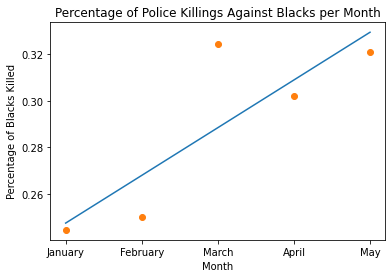

R-squared value: 0.040192589952


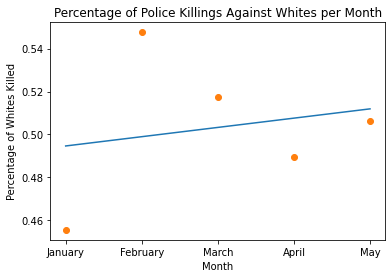

R-squared value: 0.164992045845


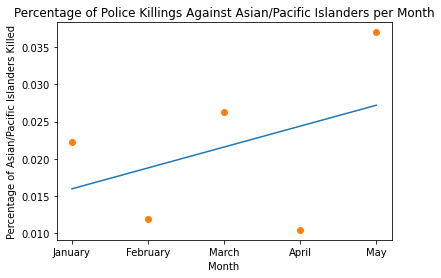

R-squared value: 0.344292698506


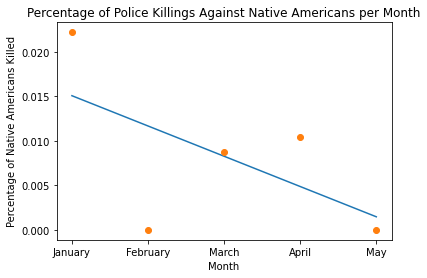

R-squared value: 0.647780985901


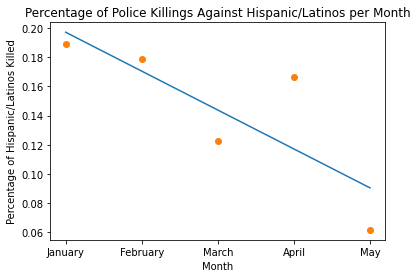

R-squared value: 0.012560727253


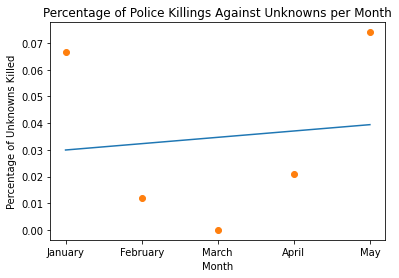

In [ ]:
# Calculating total number of killings per month
total = (temp_df['Asian/Pacific Islander'] + temp_df['White']
         + temp_df['Native American'] + temp_df['Hispanic/Latino']
         + temp_df['Unknown'] + temp_df['Black'])

# Below variables represent the percentage of race killings compared to the total per month
perc_black = temp_df['Black'] / total
perc_white = temp_df['White'] / total
perc_island = temp_df['Asian/Pacific Islander'] / total
perc_native = temp_df['Native American'] / total
perc_hispanic = temp_df['Hispanic/Latino'] / total
perc_unknown = temp_df['Unknown'] / total

# Returns total number of killings in month given by parameter
def getTotal(month):
  return (temp_df['Asian/Pacific Islander'][month] + temp_df['White'][month]
         + temp_df['Native American'][month] + temp_df['Hispanic/Latino'][month]
         + temp_df['Unknown'][month] + temp_df['Black'][month])

# Plots Linear Regression of graph and prints R-squared given an array
x = np.array([0, 1, 2, 3, 4])

# Function to plot the Linear Regression Line
def plotLinearRegression(race):
  y = []
  for i in range(0, 5):
    y.append(temp_df[race][i]/getTotal(i))
  m, b = np.polyfit(x, y, 1)
  mt.plot(x, m*x + b)
  getRSquared(x, y, 1)

# Function to print the R-Squared value given arrays x, y and degree of first order term
def getRSquared(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)

    # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    # R-Squared
    p = np.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    results['determination'] = ssreg / sstot

    print("R-squared value: " + "{:.12f}".format(results['determination']))

# Plotting Linear Regression on Black Race Graph 
plotLinearRegression('Black')
mt.plot(index, perc_black, 'o')
mt.title('Percentage of Police Killings Against Blacks per Month')
mt.xlabel('Month')
mt.ylabel('Percentage of Blacks Killed')
mt.show()

# Plotting Linear Regression on White Race Graph 
plotLinearRegression('White')
mt.plot(index, perc_white, 'o')
mt.title('Percentage of Police Killings Against Whites per Month')
mt.xlabel('Month')
mt.ylabel('Percentage of Whites Killed')
mt.show()

# Plotting Linear Regression on Asian/Pacific Islanders Race Graph 
plotLinearRegression('Asian/Pacific Islander')
mt.plot(index, perc_island, 'o')
mt.title('Percentage of Police Killings Against Asian/Pacific Islanders per Month')
mt.xlabel('Month')
mt.ylabel('Percentage of Asian/Pacific Islanders Killed')
mt.show()

# Plotting Linear Regression on Native American Race Graph 
plotLinearRegression('Native American')
mt.plot(index, perc_native, 'o')
mt.title('Percentage of Police Killings Against Native Americans per Month')
mt.xlabel('Month')
mt.ylabel('Percentage of Native Americans Killed')
mt.show()

# Plotting Linear Regression on Hispanic/Latino Race Graph 
plotLinearRegression('Hispanic/Latino')
mt.plot(index, perc_hispanic, 'o')
mt.title('Percentage of Police Killings Against Hispanic/Latinos per Month')
mt.xlabel('Month')
mt.ylabel('Percentage of Hispanic/Latinos Killed')
mt.show()

# Plotting Linear Regression on Other Race Graph 
plotLinearRegression('Unknown')
mt.plot(index, perc_unknown, 'o')
mt.title('Percentage of Police Killings Against Unknowns per Month')
mt.xlabel('Month')
mt.ylabel('Percentage of Unknowns Killed')
mt.show()

Above are the six plotted graphs of the percentage of police killings against each race per month. With these graphs we can see that the majority of police killings occur against the White race, followed Blacks, and Hispanics. Based on the "Percentage of Police Killings Against Blacks per Month" graph, a linearly increasing trend is evident based on the linear regression. We had the linear regression function plot the regression as well as the calculated R-Squared to help determine the predictive significance of the regression model. Based on the R-Squared value of roughly 0.7059, the regression is relatively significant. This promotes the increasing positive trend and suggests that in the future the percentage of police killings on the Black race will increase. Additionally, we see the R-Squared value of roughly 0.6479 for the "Percentage of Police Killings Against Hispanic/Latinos per Month" graph that suggests a slight predictive significance of the linearly decreasing trend. Since the other four graphs hold significantly lower R-Squared values, it is not appropriate to suggest the linear regression holds an predictive power.

In [ ]:
# Function to predict the percentage of police killings given a race and month parameter
def prediction(race, month):
  y = []
  for i in range(0, 5):
    y.append(temp_df[race][i]/getTotal(i))
  m, b = np.polyfit(x, y, 1)
  return (m*month + b)

print("Predicted percentage of police killings in June of 2015 against the Black race: " 
      + "{:.12f}".format(prediction('Black', 5)))
print("Predicted percentage of police killings in June of 2015 against the Hispanic/Latino race: " 
      + "{:.12f}".format(prediction('Hispanic/Latino', 5)))

Predicted percentage of police killings in June of 2015 against the Black race: 0.349966293047
Predicted percentage of police killings in June of 2015 against the Hispanic/Latino race: 0.063864754479


In the above code, we have a function to predict the percentage of police killings given a race and month parameter. We fed in parameters to see the predicted percentage of police killings of Blacks and Hispanic/Latinos in June of 2015. The model predicts that roughly 35% of all police killings in June of 2015 will be against those of the Black race. The model also predicts that roughly 6% of all police killings in June of 2015 will be against those of the Hispanic/Latino race. We ran prediction points for these races simply because of how high the R-Squared value is to suggest the linear regression is a better fit for the models.

The prediction points calculated above are based on the fitted model's linear regression. Though these results reflect the linear trends well, there are many reasons the prediction points may not be as accurate as expected. One reason being the amount of data we have compiled and used to create these predictions. Due to how we only pulled data from 5 months in 2015, predicted values for the next several months or even into the next year will yield unproportional and inaccurate results. Additionaly, since the other four graphs hold significantly lower R-Squared values, it is not appropriate to suggest the linear regression holds any predictive power. To combat this, we decided to fit the data into a polynomial regression to see how much more predictive power and significance the polynomial regression will have over our current linear regression.

R-squared value: 0.765138181707


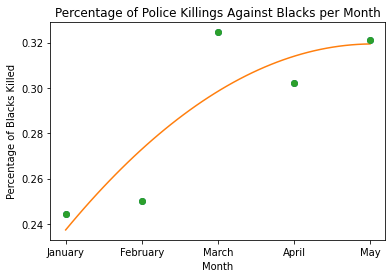

R-squared value: 0.380972351303


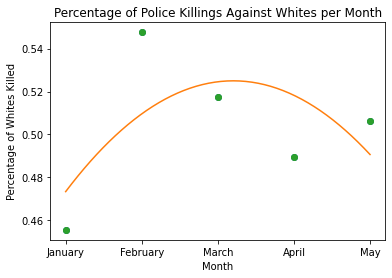

R-squared value: 0.447431296352


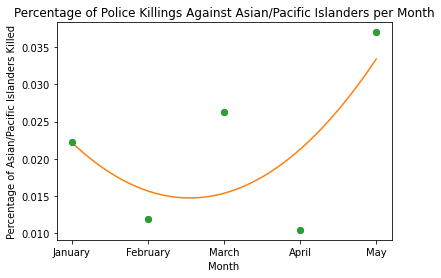

R-squared value: 0.402003020669


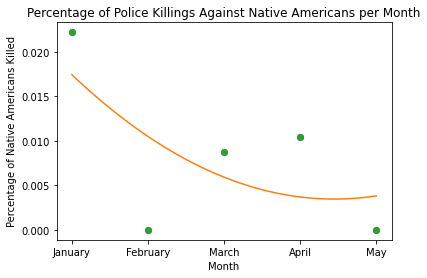

R-squared value: 0.700211763361


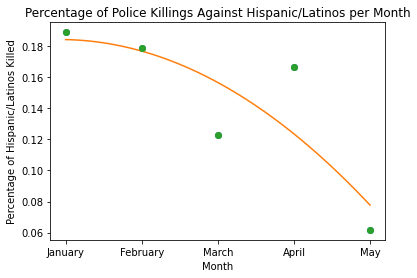

R-squared value: 0.997262045568


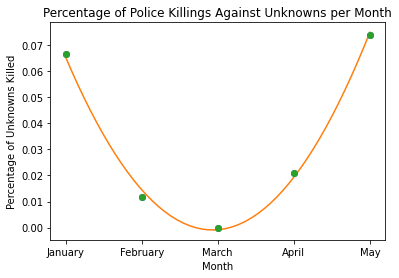

In [ ]:
# Function to plot the Polynomial Regression Line
def plotPolynomialRegression(race):
  y = []
  for i in range(0, 5):
    y.append(temp_df[race][i]/getTotal(i))

  coefficients = np.polyfit(x, y, 2)
  poly = np.poly1d(coefficients)
  new_x = np.linspace(x[0], x[-1])
  new_y = poly(new_x)
  mt.plot(x, y, 'o', new_x, new_y)
  getRSquared(x, y, 2)

# Plotting Black Race Graph 
plotPolynomialRegression('Black')
mt.plot(index, perc_black, 'o')
mt.title('Percentage of Police Killings Against Blacks per Month')
mt.xlabel('Month')
mt.ylabel('Percentage of Blacks Killed')
mt.show()

# Plotting White Race Graph 
plotPolynomialRegression('White')
mt.plot(index, perc_white, 'o')
mt.title('Percentage of Police Killings Against Whites per Month')
mt.xlabel('Month')
mt.ylabel('Percentage of Whites Killed')
mt.show()

# Plotting Asian/Pacific Islanders Race Graph 
plotPolynomialRegression('Asian/Pacific Islander')
mt.plot(index, perc_island, 'o')
mt.title('Percentage of Police Killings Against Asian/Pacific Islanders per Month')
mt.xlabel('Month')
mt.ylabel('Percentage of Asian/Pacific Islanders Killed')
mt.show()

# Plotting Native American Race Graph 
plotPolynomialRegression('Native American')
mt.plot(index, perc_native, 'o')
mt.title('Percentage of Police Killings Against Native Americans per Month')
mt.xlabel('Month')
mt.ylabel('Percentage of Native Americans Killed')
mt.show()

# Plotting Hispanic/Latino Race Graph 
plotPolynomialRegression('Hispanic/Latino')
mt.plot(index, perc_hispanic, 'o')
mt.title('Percentage of Police Killings Against Hispanic/Latinos per Month')
mt.xlabel('Month')
mt.ylabel('Percentage of Hispanic/Latinos Killed')
mt.show()

# Plotting Other Race Graph 
plotPolynomialRegression('Unknown')
mt.plot(index, perc_unknown, 'o')
mt.title('Percentage of Police Killings Against Unknowns per Month')
mt.xlabel('Month')
mt.ylabel('Percentage of Unknowns Killed')
mt.show()

The above graphs are of the percentage of police killings against each race per month with a polynomial regression ran for each model. Based on by simply looking at the regressions it is easy to tell how much of a better fit the polynomial regression is for all the race datasets. The most notable being the increased R-Squared value for the graph of the Black race dataset which increased from roughly 0.7059 to 0.7651. Similarly, the Hispanic/Latino graph raised its R-Squared from roughly 0.6479 to 0.7002. It is evident that the polynomial regression is a better fit since all the R-Squared values increased substantially compared to their R-Squared values of the Linear Regression models.

# **Conclusion**



*   Mention Linear and Polynomial Regression and how Black police killings are increasing and mention other trends with high R-Squared values
*   Pull percentages of population by race off census.gov (Search up "percentage of native american population in 2015")
*   Compare percentages (i.e. how disproportionate percentages are for Blacks)
*   Reasoning behind over spikes of police killings in March of 2015
*   Reasoning behind disproportions
*   What use this data will be for the general public
*   What we could do better in the future for our project (i.e. include more data, test against other factors, test against more races, etc.)


Based on the given dataset on police killings in 2015, we can reasonably say that between the months of January through May, white people have experienced the most police killings per person than that of other races in terms of frequency. Moreover, our hypothesis which tests whether the police killings were soley based on one race is not true because in the given data sets, other races have experienced police killings. According to the linear regression model, one can see that the killings for blacks, whites, Asian/Pacific Islanders, and Others have a positive relationship, which then correlates to a possible increase in police killings for those given races. However in the polynomial regression, which is more accurate than the linear regression model for our case, we notice that the R-Squared values for all races have increased but the most prominent increase was that for blacks. As in, the R-Squared value for blacks increased from 0.7059 to 0.7651 Moreover, the linear regression model shows that black people are killed at a higher rate than that of any race. Out of a random sample of 150 people , the first  map illustrates the most amount of police killings occured on male white people. Also, the second map illustrates which states had the most total police killings among the data in the chart. A possible reason  as to why there was a spike in police killings in March of 2015 would be due to how there was a case which involved Jeffery L. Williams, who shot two policemen in front of the Ferguson city police headquarters. This sort of event resulted in a spike in police killings for each race on March of 2015. If we were to make improvements to the dataset, we would possibly increase the sample size and possibly get more variation of other races in our data. This will allow for more accurate predictions, and as well as more accurate trends on the data set.